In [39]:
def get_combinations(freebits):
    # return percentage of combinations of x1 and x2 such that $x1 & x2 < 1$ for a given wordsize
    return 3**freebits
def get_count_on_bits(n):
    answer = 0
    while n > 0:
        answer += (n&1)
        n//=2
    return answer

# 48 bits wordsize

In [47]:
wordsize = 48
search_space = 2**wordsize
previous = 0

best_test_numbers = {0.001: 0, 0.0001: 0,0.00001: 0}
current_best_ratios = {0.001: 0, 0.0001: 0, 0.00001: 0}

for i in range(0,search_space):
    freebits = wordsize - get_count_on_bits(i)
    previous += get_combinations(freebits)
    current_ratio = previous/(search_space*search_space)
    for (key, value) in current_best_ratios.items():
        if abs(key-current_ratio) < abs(key-value):
            best_test_numbers[key] = i
            current_best_ratios[key] = current_ratio
    if current_ratio >=0.01:
        break

print(best_test_numbers)
print(current_best_ratios)

In [41]:
freebits = 40 - get_count_on_bits(0)
get_combinations(freebits)/(2**(40*2))

1.0056585161637497e-05

In [1]:
from unicorn_utils import *
import seaborn as sns

In [2]:
pegasus_qpu = get_qpu()
chimera_qpu = DWaveSampler(solver={"name": "DW_2000Q_6"})

In [12]:
def get_input(i):
    all_filenames = "p0001 p01 p001".split(" ")
    input_lines = set()
    for filename in all_filenames:
        file = open(f"./and_experiments/qubos/and_{filename}.unicorn").readlines()
        input_lines.add(file[2+i])
    input_lines
    input_line = input_lines.pop()
    assert(len(input_lines) == 0)
    input_ = [int(x)for x in input_line.split(" ")[1].split(",")]
    print(len(input_))
    return input_
input_ids = [get_input(0), get_input(1)]

48
48


In [12]:
df = get_results_dataframe("p01", input_ids, reads=100, bottom=1.5, top=3,  is_pegasus=False, random_seed_chimera=5,
                           pegasus_qpu=pegasus_qpu, chimera_qpu=chimera_qpu, experiments_folder="and")
df.to_csv('./and_experiments/outputs/p01.csv' )
df

file: and_experiments/p01
cnf vars, clauses, clauses_to_var = 239, 476, 1.99
qubo vars 285
conn avg, variance, max = 3.32, 1.87, 6
reads: 100
chimera: 1.5 raw 0.0
1.5 pp_local_search 0.0
************
reads: 100
chimera: 1.75 raw 0.0
1.75 pp_local_search 0.0
************
reads: 100
chimera: 2.0 raw 0.0
2.0 pp_local_search 0.0
************
reads: 100
chimera: 2.25 raw 2.0
2.25 pp_local_search 2.0
************
reads: 100
chimera: 2.5 raw 2.0
2.5 pp_local_search 2.0
************
reads: 100
chimera: 2.75 raw 0.0
2.75 pp_local_search 0.0
************
reads: 100
chimera: 3.0 raw 0.0
3.0 pp_local_search 0.0
************


,file,type,chain_strength,energy,input_values,qpu
0,p01,raw,1.5,0.0,"35324235880272,153682588359172",DW_2000Q_6
1,p01,raw,1.5,2.0,"147653618284537,27625566251544",DW_2000Q_6
2,p01,raw,1.5,4.0,"17599965046090,16926474514585",DW_2000Q_6
3,p01,raw,1.5,4.0,"11007654145832,146237198365137",DW_2000Q_6
4,p01,raw,1.5,4.0,"8960410527680,25944085509170",DW_2000Q_6
...,...,...,...,...,...,...
1395,p01,pp_local_search,3.0,12.0,"28780977999204,149054519051289",DW_2000Q_6
1396,p01,pp_local_search,3.0,12.0,"241894996986228,146118818122254",DW_2000Q_6
1397,p01,pp_local_search,3.0,14.0,"53739462890608,6004642726553",DW_2000Q_6
1398,p01,pp_local_search,3.0,14.0,"128727669187451,224318809551899",DW_2000Q_6


<AxesSubplot:xlabel='chain_strength', ylabel='energy'>

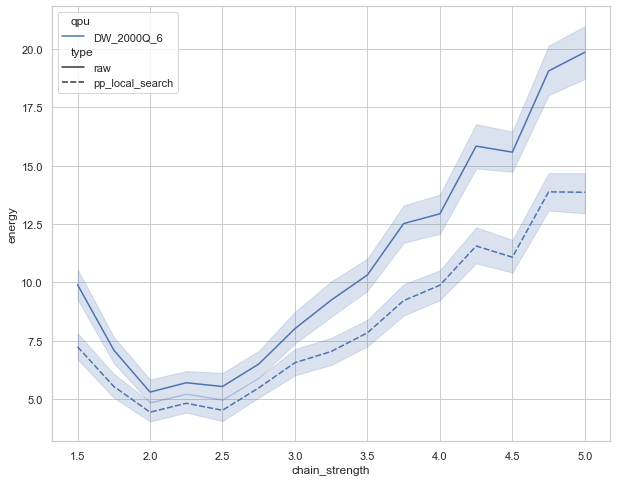

In [24]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style("whitegrid", {'axes.grid' : True})
sns.lineplot(data=df, x="chain_strength", y="energy", hue="qpu", style="type")

In [26]:
df = get_results_dataframe("p001", input_ids, reads=100, bottom=1.0, top=3, is_pegasus=False,
                           pegasus_qpu=pegasus_qpu, chimera_qpu=chimera_qpu, experiments_folder="and", random_seed_chimera=5)
df.to_csv('./and_experiments/outputs/p001.csv' )
df

file: and_experiments/p001
cnf vars, clauses, clauses_to_var = 239, 476, 1.99
qubo vars 285
conn avg, variance, max = 3.32, 1.87, 6
reads: 100
chimera: 1.0 raw 36.0
1.0 pp_local_search 36.0
************
reads: 100
chimera: 1.25 raw 14.0
1.25 pp_local_search 14.0
************
reads: 100
chimera: 1.5 raw 4.0
1.5 pp_local_search 4.0
************
reads: 100
chimera: 1.75 raw 2.0
1.75 pp_local_search 2.0
************
reads: 100
chimera: 2.0 raw 2.0
2.0 pp_local_search 2.0
************
reads: 100
chimera: 2.25 raw 2.0
2.25 pp_local_search 2.0
************
reads: 100
chimera: 2.5 raw 0.0
2.5 pp_local_search 0.0
************
reads: 100
chimera: 2.75 raw 2.0
2.75 pp_local_search 2.0
************
reads: 100
chimera: 3.0 raw 2.0
3.0 pp_local_search 2.0
************


,file,type,chain_strength,energy,input_values,qpu
0,p001,raw,1.0,36.0,"249141722361,1101997139472",DW_2000Q_6
1,p001,raw,1.0,36.0,"27998926595347,138714085072",DW_2000Q_6
2,p001,raw,1.0,36.0,"49525268866097,3299107597496",DW_2000Q_6
3,p001,raw,1.0,40.0,"247398706331249,9916317345206",DW_2000Q_6
4,p001,raw,1.0,40.0,"167134867416081,2961439912976",DW_2000Q_6
...,...,...,...,...,...,...
1795,p001,pp_local_search,3.0,10.0,"125450851041585,28603725624365",DW_2000Q_6
1796,p001,pp_local_search,3.0,10.0,"134497018538049,220764852063163",DW_2000Q_6
1797,p001,pp_local_search,3.0,10.0,"178447351662099,83118224330128",DW_2000Q_6
1798,p001,pp_local_search,3.0,10.0,"156133977525794,83825470495228",DW_2000Q_6


In [20]:
df = get_results_dataframe("p0001", input_ids, reads=100, bottom=1.5, top=5, is_pegasus=False,
                           pegasus_qpu=pegasus_qpu, chimera_qpu=chimera_qpu, experiments_folder="and", random_seed_chimera=5)
df.to_csv('./and_experiments/outputs/p0001.csv' )
df

file: and_experiments/p0001
cnf vars, clauses, clauses_to_var = 239, 476, 1.99
qubo vars 285
conn avg, variance, max = 3.32, 1.87, 6
reads: 100
chimera: 1.5 raw 4.0
1.5 pp_local_search 4.0
************
reads: 100
chimera: 1.75 raw 2.0
1.75 pp_local_search 2.0
************
reads: 100
chimera: 2.0 raw 2.0
2.0 pp_local_search 2.0
************
reads: 100
chimera: 2.25 raw 2.0
2.25 pp_local_search 2.0
************
reads: 100
chimera: 2.5 raw 2.0
2.5 pp_local_search 2.0
************
reads: 100
chimera: 2.75 raw 2.0
2.75 pp_local_search 2.0
************
reads: 100
chimera: 3.0 raw 2.0
3.0 pp_local_search 2.0
************


,file,type,chain_strength,energy,input_values,qpu
0,p0001,raw,1.5,4.0,"4437115015785,141358150059004",DW_2000Q_6
1,p0001,raw,1.5,6.0,"221316620766285,18217382913864",DW_2000Q_6
2,p0001,raw,1.5,6.0,"61824333702870,3320638996992",DW_2000Q_6
3,p0001,raw,1.5,6.0,"203577214293731,1443182423064",DW_2000Q_6
4,p0001,raw,1.5,6.0,"142116211007850,570778194793",DW_2000Q_6
...,...,...,...,...,...,...
1395,p0001,pp_local_search,3.0,12.0,"58550095784134,186112454849364",DW_2000Q_6
1396,p0001,pp_local_search,3.0,12.0,"422002129441,204992142395553",DW_2000Q_6
1397,p0001,pp_local_search,3.0,12.0,"118099947562655,230622614304997",DW_2000Q_6
1398,p0001,pp_local_search,3.0,12.0,"242306352030950,49298185302059",DW_2000Q_6


In [13]:
print(get_best_chain_strength("./and_experiments/outputs/p01.csv"))
print(get_best_chain_strength("./and_experiments/outputs/p001.csv"))
print(get_best_chain_strength("./and_experiments/outputs/p0001.csv"))

total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
([2.0], 0.04)
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
([2.5], 0.01)
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
([1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0], 0.0)


<AxesSubplot:xlabel='energy', ylabel='Count'>

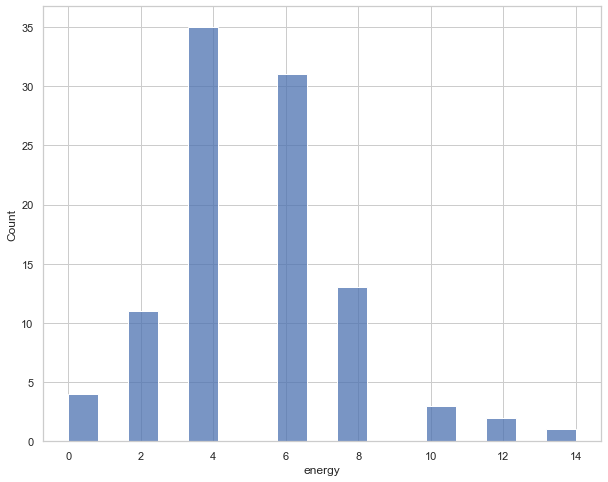

In [14]:
p1_df = pd.read_csv('./and_experiments/outputs/p01.csv')
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style("whitegrid", {'axes.grid' : True})

sns.histplot(p1_df[(p1_df.type=="raw") & (p1_df.chain_strength == 2)].energy)

<AxesSubplot:xlabel='energy', ylabel='Count'>

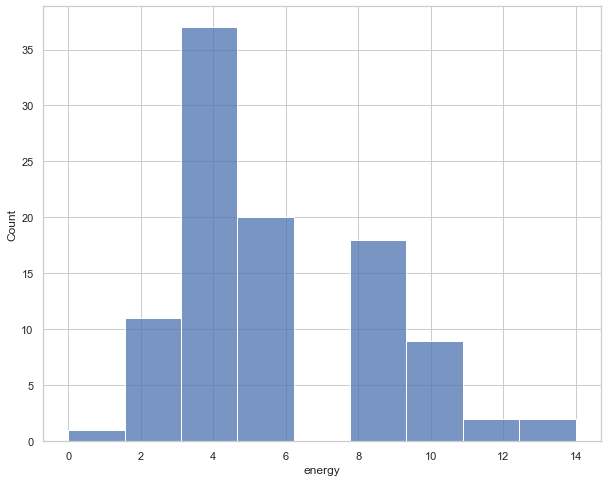

In [34]:
p1_df = pd.read_csv('./and_experiments/outputs/p001.csv')
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style("whitegrid", {'axes.grid' : True})

sns.histplot(p1_df[(p1_df.type=="raw") & (p1_df.chain_strength == 2.5)].energy)

<AxesSubplot:xlabel='energy', ylabel='Count'>

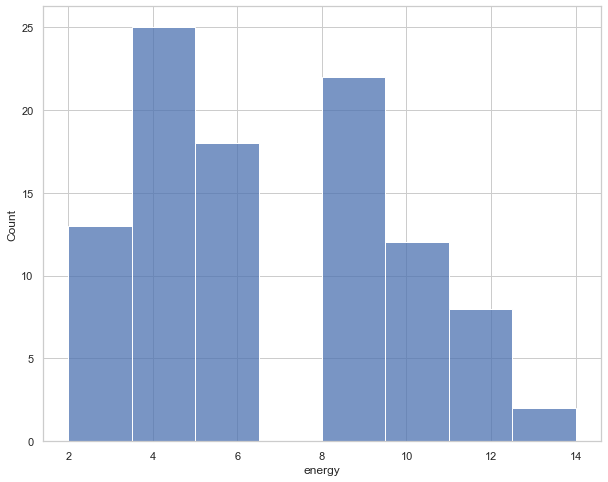

In [33]:
p1_df = pd.read_csv('./and_experiments/outputs/p0001.csv')
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style("whitegrid", {'axes.grid' : True})

sns.histplot(p1_df[(p1_df.type=="raw") & (p1_df.chain_strength == 1.75)].energy)

In [93]:
from pysat.solvers import Solver
from pysat.formula import CNF
import time
solvers = ['cadical', 'gluecard3', 'gluecard4','glucose3', 'glucose4', 'lingeling', 'maplechrono',
        'maplecm', 'maplesat', 'mergesat3', 'minicard', 'minisat22','minisat-gh']
times_column = []
probs_column = []
solvers_column = []
file_names_to_probs = {
    'p01': 0.001,
    'p001': 0.0001,
    'p0001': 0.00001,
}
for file in ['p01', 'p001', 'p0001']:
    print(f"processing file: {file}")
    formula = CNF(from_file=f'./and_experiments/cnfs/and_{file}.cnf')
    assert(file in file_names_to_probs.keys())
    for solver_name in solvers:
        solver = Solver(name=solver_name, bootstrap_with=formula.clauses)
        current_times = []
        for i in range(100000):
            init_time = time.perf_counter()
            solver.solve()
            current_times.append(round((time.perf_counter() - init_time)*10000, 3))
            
        avg_time = sum(current_times)
        #times.append(sum(current_times)/len(current_times))
        probs_column.append(file_names_to_probs[file])
        times_column.append(sum(current_times)/len(current_times))
        solvers_column.append(solver_name)
cnf_files_df = pd.DataFrame({
    'sat_ratio': probs_column,
    'solver': solvers_column,
    'time': times_column
})
cnf_files_df.sort_values(by=['time'])

processing file: p01
processing file: p001
processing file: p0001


,sat_ratio,solver,time
26,0.00001,cadical,0.046379
38,0.00001,minisat-gh,0.048751
37,0.00001,minisat22,0.048769
34,0.00001,maplesat,0.049303
36,0.00001,minicard,0.050007
13,0.00010,cadical,0.050706
25,0.00010,minisat-gh,0.051917
21,0.00010,maplesat,0.052639
24,0.00010,minisat22,0.052835
23,0.00010,minicard,0.053310


[None]

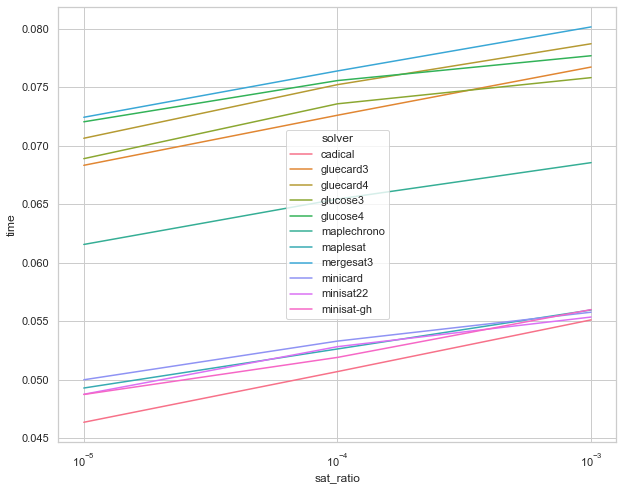

In [98]:
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style("whitegrid", {'axes.grid' : True})

a = sns.lineplot(x='sat_ratio', y='time', data=cnf_files_df[cnf_files_df.time < 0.1], hue="solver")
a.set(xscale="log")

# 40bit wordsize

In [48]:
wordsize = 40
search_space = 2**wordsize
previous = 0

best_test_numbers = {0.01: 0,0.001: 0, 0.0001: 0,0.00001: 0}
current_best_ratios = {0.01: 0,0.001: 0, 0.0001: 0, 0.00001: 0}

for i in range(0,search_space):
    freebits = wordsize - get_count_on_bits(i)
    previous += get_combinations(freebits)
    current_ratio = previous/(search_space*search_space)
    for (key, value) in current_best_ratios.items():
        if abs(key-current_ratio) < abs(key-value):
            best_test_numbers[key] = i
            current_best_ratios[key] = current_ratio
    if current_ratio >=0.01:
        break

print(best_test_numbers)
print(current_best_ratios)

{0.01: 15859712, 0.001: 61471, 0.0001: 235, 1e-05: 0}
{0.01: 0.010000003106913086, 0.001: 0.000999994970092686, 0.0001: 9.998645987866746e-05, 1e-05: 1.0056585161637497e-05}


In [55]:
pegasus_qpu = get_qpu()
chimera_qpu = DWaveSampler(solver={"name": "DW_2000Q_6"})

In [59]:

import sys
sys.path.append("../")
from utils import load_cnf, cnf_to_bqm
from embedding_utils import *
bqm = get_file_bqm('p1', '40bit_and')
get_embedding_statistics(find_best_embedding(bqm, chimera_qpu))

file: 40bit_and_experiments/p1
cnf vars, clauses, clauses_to_var = 199, 396, 1.99
qubo vars 237
conn avg, variance, max = 3.32, 1.87, 6
best embedding random_seed 83
best embedding max_chain_length 5
best embedding qubits used 423
best embedding variance: 0.7967174426088822


AttributeError: 'tuple' object has no attribute 'items'

In [63]:
def get_input(i):
    all_filenames = "p1 p0001 p01 p001".split(" ")
    input_lines = set()
    for filename in all_filenames:
        file = open(f"./40bit_and_experiments/qubos/40bit_and_{filename}.unicorn").readlines()
        input_lines.add(file[2+i])
    input_lines
    input_line = input_lines.pop()
    assert(len(input_lines) == 0)
    input_ = [int(x)for x in input_line.split(" ")[1].split(",")]
    print(len(input_))
    return input_
input_ids = [get_input(0), get_input(1)]

40
40


In [83]:
df = get_results_dataframe("p1", input_ids, reads=100, bottom=1.5, top=3,  is_pegasus=False, random_seed_chimera=83,
                           pegasus_qpu=pegasus_qpu, chimera_qpu=chimera_qpu, experiments_folder="40bit_and")
df.to_csv('./40bit_and_experiments/outputs/p1.csv' )
df

file: 40bit_and_experiments/p1
cnf vars, clauses, clauses_to_var = 199, 396, 1.99
qubo vars 237
conn avg, variance, max = 3.32, 1.87, 6
reads: 100
chimera: 1.5 raw 4.0
1.5 pp_local_search 4.0
************
reads: 100
chimera: 1.75 raw 0.0
1.75 pp_local_search 0.0
************
reads: 100
chimera: 2.0 raw 0.0
2.0 pp_local_search 0.0
************
reads: 100
chimera: 2.25 raw 0.0
2.25 pp_local_search 0.0
************
reads: 100
chimera: 2.5 raw 0.0
2.5 pp_local_search 0.0
************
reads: 100
chimera: 2.75 raw 0.0
2.75 pp_local_search 0.0
************
reads: 100
chimera: 3.0 raw 2.0
3.0 pp_local_search 2.0
************


,file,type,chain_strength,energy,input_values,qpu
0,p1,raw,1.5,4.0,"275124388938,101200697474",DW_2000Q_6
1,p1,raw,1.5,4.0,"1298391368,700418410633",DW_2000Q_6
2,p1,raw,1.5,6.0,"138128540762,54637627684",DW_2000Q_6
3,p1,raw,1.5,6.0,"911751596611,13851972633",DW_2000Q_6
4,p1,raw,1.5,8.0,"489788477705,555758649377",DW_2000Q_6
...,...,...,...,...,...,...
1395,p1,pp_local_search,3.0,10.0,"860885245980,648188960129",DW_2000Q_6
1396,p1,pp_local_search,3.0,10.0,"364777729602,43370629137",DW_2000Q_6
1397,p1,pp_local_search,3.0,12.0,"74350473682,233407154835",DW_2000Q_6
1398,p1,pp_local_search,3.0,12.0,"601792538394,622803099766",DW_2000Q_6


In [66]:
df = get_results_dataframe("p01", input_ids, reads=100, bottom=1.5, top=3,  is_pegasus=False, random_seed_chimera=83,
                           pegasus_qpu=pegasus_qpu, chimera_qpu=chimera_qpu, experiments_folder="40bit_and")
df.to_csv('./40bit_and_experiments/outputs/p01.csv' )
df

file: 40bit_and_experiments/p01
cnf vars, clauses, clauses_to_var = 199, 396, 1.99
qubo vars 237
conn avg, variance, max = 3.32, 1.87, 6
reads: 100
chimera: 1.5 raw 4.0
1.5 pp_local_search 4.0
************
reads: 100
chimera: 1.75 raw 0.0
1.75 pp_local_search 0.0
************
reads: 100
chimera: 2.0 raw 0.0
2.0 pp_local_search 0.0
************
reads: 100
chimera: 2.25 raw 0.0
2.25 pp_local_search 0.0
************
reads: 100
chimera: 2.5 raw 0.0
2.5 pp_local_search 0.0
************
reads: 100
chimera: 2.75 raw 0.0
2.75 pp_local_search 0.0
************
reads: 100
chimera: 3.0 raw 2.0
3.0 pp_local_search 2.0
************


,file,type,chain_strength,energy,input_values,qpu
0,p01,raw,1.5,4.0,"826110288049,97360381000",DW_2000Q_6
1,p01,raw,1.5,4.0,"361183754473,139650146613",DW_2000Q_6
2,p01,raw,1.5,4.0,"36727046435,30883527297",DW_2000Q_6
3,p01,raw,1.5,4.0,"1082180658,161435669140",DW_2000Q_6
4,p01,raw,1.5,6.0,"309936300290,93890060299",DW_2000Q_6
...,...,...,...,...,...,...
1395,p01,pp_local_search,3.0,10.0,"741218283124,429931082895",DW_2000Q_6
1396,p01,pp_local_search,3.0,10.0,"362331422806,623910762859",DW_2000Q_6
1397,p01,pp_local_search,3.0,12.0,"163303236304,46440120443",DW_2000Q_6
1398,p01,pp_local_search,3.0,14.0,"80543765036,464650443890",DW_2000Q_6


In [67]:
df = get_results_dataframe("p001", input_ids, reads=100, bottom=1.5, top=3,  is_pegasus=False, random_seed_chimera=83,
                           pegasus_qpu=pegasus_qpu, chimera_qpu=chimera_qpu, experiments_folder="40bit_and")
df.to_csv('./40bit_and_experiments/outputs/p001.csv' )
df

file: 40bit_and_experiments/p001
cnf vars, clauses, clauses_to_var = 199, 396, 1.99
qubo vars 237
conn avg, variance, max = 3.32, 1.87, 6
reads: 100
chimera: 1.5 raw 2.0
1.5 pp_local_search 2.0
************
reads: 100
chimera: 1.75 raw 0.0
1.75 pp_local_search 0.0
************
reads: 100
chimera: 2.0 raw 0.0
2.0 pp_local_search 0.0
************
reads: 100
chimera: 2.25 raw 2.0
2.25 pp_local_search 2.0
************
reads: 100
chimera: 2.5 raw 2.0
2.5 pp_local_search 2.0
************
reads: 100
chimera: 2.75 raw 2.0
2.75 pp_local_search 2.0
************
reads: 100
chimera: 3.0 raw 2.0
3.0 pp_local_search 2.0
************


,file,type,chain_strength,energy,input_values,qpu
0,p001,raw,1.5,2.0,"105513640389,288375769133",DW_2000Q_6
1,p001,raw,1.5,4.0,"266416515824,69010478536",DW_2000Q_6
2,p001,raw,1.5,4.0,"284967995644,24227087809",DW_2000Q_6
3,p001,raw,1.5,4.0,"77323714791,299550411037",DW_2000Q_6
4,p001,raw,1.5,4.0,"550092931235,421096491544",DW_2000Q_6
...,...,...,...,...,...,...
1395,p001,pp_local_search,3.0,10.0,"379826999299,39863668057",DW_2000Q_6
1396,p001,pp_local_search,3.0,10.0,"215367443104,1081142517133",DW_2000Q_6
1397,p001,pp_local_search,3.0,12.0,"3632877638,272181665038",DW_2000Q_6
1398,p001,pp_local_search,3.0,12.0,"39050705170,311002771599",DW_2000Q_6


In [68]:
df = get_results_dataframe("p0001", input_ids, reads=100, bottom=1.5, top=3,  is_pegasus=False, random_seed_chimera=83,
                           pegasus_qpu=pegasus_qpu, chimera_qpu=chimera_qpu, experiments_folder="40bit_and")
df.to_csv('./40bit_and_experiments/outputs/p0001.csv' )
df

file: 40bit_and_experiments/p0001
cnf vars, clauses, clauses_to_var = 199, 396, 1.99
qubo vars 237
conn avg, variance, max = 3.32, 1.87, 6
reads: 100
chimera: 1.5 raw 4.0
1.5 pp_local_search 4.0
************
reads: 100
chimera: 1.75 raw 2.0
1.75 pp_local_search 2.0
************
reads: 100
chimera: 2.0 raw 0.0
2.0 pp_local_search 0.0
************
reads: 100
chimera: 2.25 raw 0.0
2.25 pp_local_search 0.0
************
reads: 100
chimera: 2.5 raw 2.0
2.5 pp_local_search 2.0
************
reads: 100
chimera: 2.75 raw 2.0
2.75 pp_local_search 2.0
************
reads: 100
chimera: 3.0 raw 2.0
3.0 pp_local_search 2.0
************


,file,type,chain_strength,energy,input_values,qpu
0,p0001,raw,1.5,4.0,"5772958208,326531974338",DW_2000Q_6
1,p0001,raw,1.5,6.0,"749509804052,74064176901",DW_2000Q_6
2,p0001,raw,1.5,6.0,"17873571851,417091629276",DW_2000Q_6
3,p0001,raw,1.5,6.0,"558350417921,88728547615",DW_2000Q_6
4,p0001,raw,1.5,6.0,"571598196876,414599086123",DW_2000Q_6
...,...,...,...,...,...,...
1395,p0001,pp_local_search,3.0,10.0,"151980693570,120141723815",DW_2000Q_6
1396,p0001,pp_local_search,3.0,10.0,"121437817634,996057365673",DW_2000Q_6
1397,p0001,pp_local_search,3.0,10.0,"1032366621104,205890312344",DW_2000Q_6
1398,p0001,pp_local_search,3.0,12.0,"401181606743,776660204810",DW_2000Q_6


In [85]:
print(get_best_chain_strength("./40bit_and_experiments/outputs/p1.csv"))
print(get_best_chain_strength("./40bit_and_experiments/outputs/p01.csv"))
print(get_best_chain_strength("./40bit_and_experiments/outputs/p001.csv"))
print(get_best_chain_strength("./40bit_and_experiments/outputs/p0001.csv"))

total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
([2.0], 0.12)
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
([2.0], 0.08)
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
([2.0], 0.03)
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_sa

total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100


<AxesSubplot:xlabel='energy', ylabel='Count'>

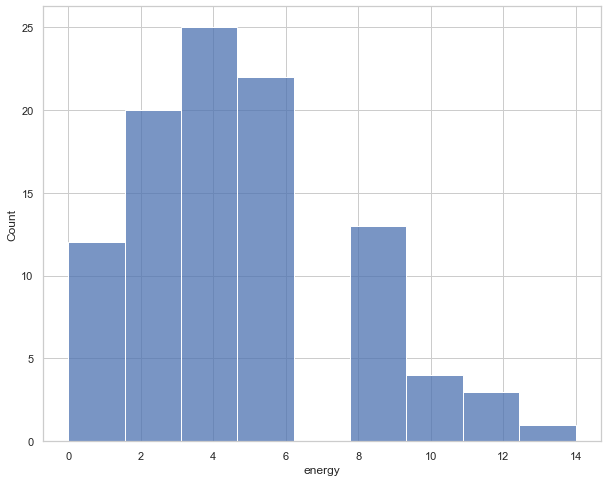

In [84]:
file = "./40bit_and_experiments/outputs/p1.csv"
p1_df = pd.read_csv(file)
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style("whitegrid", {'axes.grid' : True})

sns.histplot(p1_df[(p1_df.type=="raw") & (p1_df.chain_strength == get_best_chain_strength(file)[0][0])].energy)

total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100


<AxesSubplot:xlabel='energy', ylabel='Count'>

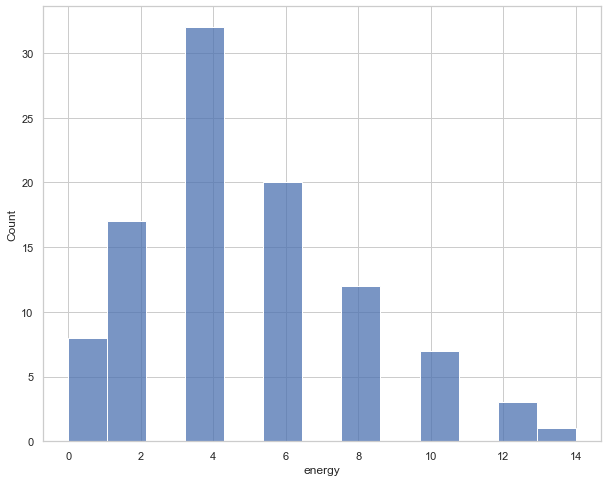

In [86]:
file = "./40bit_and_experiments/outputs/p01.csv"
p1_df = pd.read_csv(file)
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style("whitegrid", {'axes.grid' : True})

sns.histplot(p1_df[(p1_df.type=="raw") & (p1_df.chain_strength == get_best_chain_strength(file)[0][0])].energy)

total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100


<AxesSubplot:xlabel='energy', ylabel='Count'>

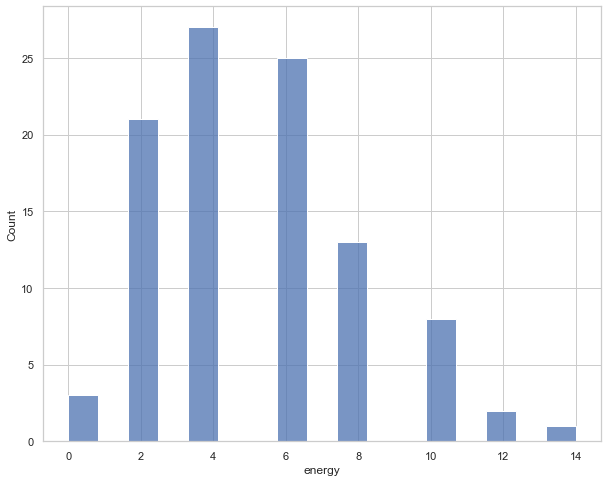

In [87]:
file = "./40bit_and_experiments/outputs/p001.csv"
p1_df = pd.read_csv(file)
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style("whitegrid", {'axes.grid' : True})

sns.histplot(p1_df[(p1_df.type=="raw") & (p1_df.chain_strength == get_best_chain_strength(file)[0][0])].energy)

total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100
total_samples: 100


<AxesSubplot:xlabel='energy', ylabel='Count'>

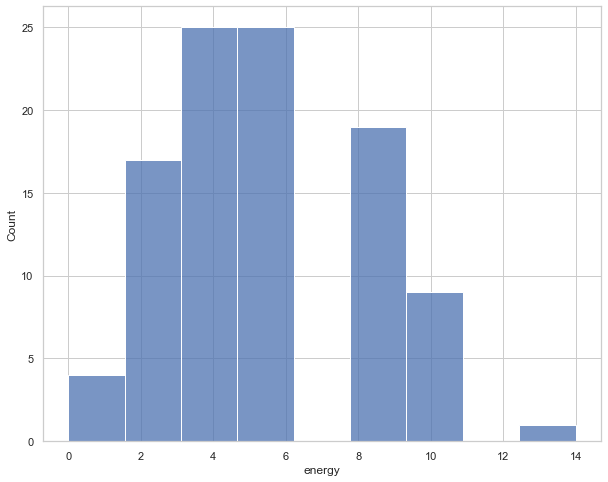

In [88]:
file = "./40bit_and_experiments/outputs/p0001.csv"
p1_df = pd.read_csv(file)
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style("whitegrid", {'axes.grid' : True})

sns.histplot(p1_df[(p1_df.type=="raw") & (p1_df.chain_strength == get_best_chain_strength(file)[0][0])].energy)

In [101]:
from pysat.solvers import Solver
from pysat.formula import CNF
import time
solvers = ['cadical', 'gluecard3', 'gluecard4','glucose3', 'glucose4', 'lingeling', 'maplechrono',
        'maplecm', 'maplesat', 'mergesat3', 'minicard', 'minisat22','minisat-gh']
times_column = []
probs_column = []
solvers_column = []
file_names_to_probs = {
    'p1': 0.01,
    'p01': 0.001,
    'p001': 0.0001,
    'p0001': 0.00001,
}
for file in ['p01', 'p001', 'p0001']:
    print(f"processing file: {file}")
    formula = CNF(from_file=f'./40bit_and_experiments/cnfs/40bit_and_{file}.cnf')
    assert(file in file_names_to_probs.keys())
    for solver_name in solvers:
        solver = Solver(name=solver_name, bootstrap_with=formula.clauses)
        current_times = []
        for i in range(100000):
            init_time = time.perf_counter()
            solver.solve()
            current_times.append(round((time.perf_counter() - init_time)*10000, 3))
            
        avg_time = sum(current_times)
        #times.append(sum(current_times)/len(current_times))
        probs_column.append(file_names_to_probs[file])
        times_column.append(sum(current_times)/len(current_times))
        solvers_column.append(solver_name)
cnf_files_df = pd.DataFrame({
    'sat_ratio': probs_column,
    'solver': solvers_column,
    'time': times_column
})
cnf_files_df.sort_values(by=['time'])

processing file: p01
processing file: p001
processing file: p0001


,sat_ratio,solver,time
26,0.00001,cadical,0.040997
38,0.00001,minisat-gh,0.042605
37,0.00001,minisat22,0.042970
34,0.00001,maplesat,0.042996
36,0.00001,minicard,0.043099
13,0.00010,cadical,0.045089
25,0.00010,minisat-gh,0.045252
23,0.00010,minicard,0.045822
24,0.00010,minisat22,0.045825
21,0.00010,maplesat,0.046015


[None]

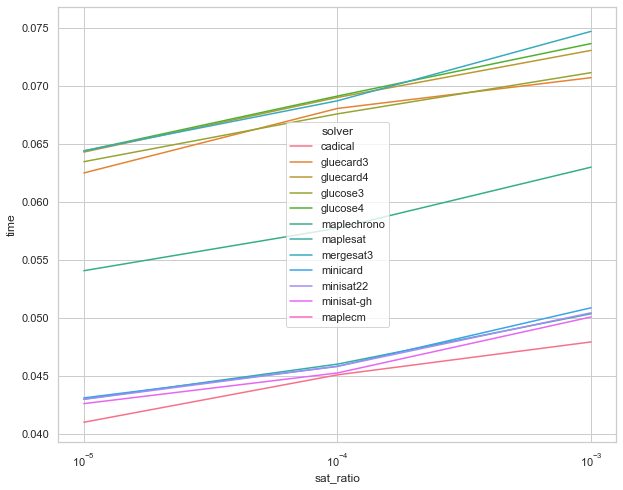

In [102]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style("whitegrid", {'axes.grid' : True})

a = sns.lineplot(x='sat_ratio', y='time', data=cnf_files_df[cnf_files_df.time < 0.1], hue="solver")
a.set(xscale="log")

# Scaling QUBO by 0.5

In [108]:
max([abs(x) for x in bqm.linear.values()])

12.0

In [109]:
max([abs(x) for x in bqm.quadratic.values()])

4.0

In [3]:
def get_input(i):
    all_filenames = "p0001 p01 p001".split(" ")
    input_lines = set()
    for filename in all_filenames:
        file = open(f"./and_experiments/qubos/and_{filename}.unicorn").readlines()
        input_lines.add(file[2+i])
    input_lines
    input_line = input_lines.pop()
    assert(len(input_lines) == 0)
    input_ = [int(x)for x in input_line.split(" ")[1].split(",")]
    print(len(input_))
    return input_
input_ids = [get_input(0), get_input(1)]

48
48
